In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
piHeat = plt.imread('piHeat.png')
piGray = piHeat[..., 0].copy()
cold = piGray < 1 / 2
piGray[cold] = 0
piGray[~cold] = 1

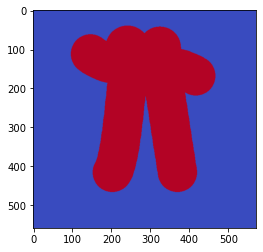

In [3]:
plt.imshow(piHeat)

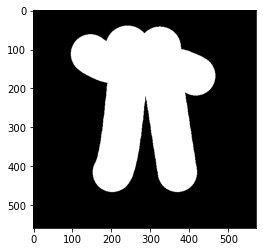

In [4]:
plt.imshow(piGray, cmap='gray')

In [5]:
hatPi = np.fft.fft2(piGray)

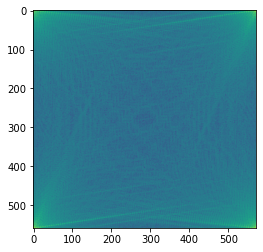

In [6]:
plt.imshow(np.log(np.abs(hatPi)))

Text(0.5, 1.0, 'Filtered Spectrum')

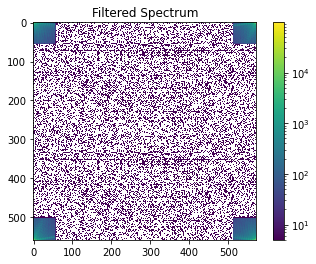

In [7]:
# http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html


def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = hatPi.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')


Text(0.5, 1.0, 'Reconstructed Image')

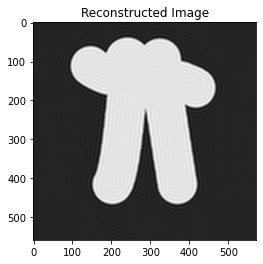

In [8]:
im_new = np.fft.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5, 1.0, 'Filtered Spectrum')

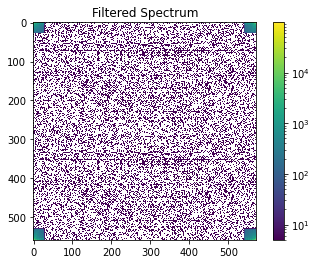

In [9]:
keep_fraction2 = 0.05

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2bis = hatPi.copy()

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2bis[int(r*keep_fraction2):int(r*(1-keep_fraction2))] = 0

# Similarly with the columns:
im_fft2bis[:, int(c*keep_fraction2):int(c*(1-keep_fraction2))] = 0

plt.figure()
plot_spectrum(im_fft2bis)
plt.title('Filtered Spectrum')


Text(0.5, 1.0, 'Reconstructed Image')

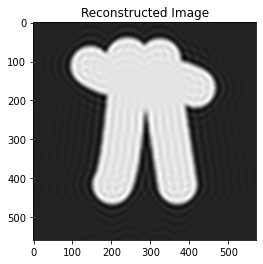

In [10]:
im_newbis = np.fft.ifft2(im_fft2bis).real

plt.figure()
plt.imshow(im_newbis, plt.cm.gray)
plt.title('Reconstructed Image')

In [11]:
def fourierFraction(keep_fraction):
    # Call ff a copy of the original transform. Numpy arrays have a copy
    # method for this purpose.
    im_fft2 = hatPi.copy()

    # Set r and c to be the number of rows and columns of the array.
    r, c = im_fft2.shape

    # Set to zero all rows with indices between r*keep_fraction and
    # r*(1-keep_fraction):
    im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

    # Similarly with the columns:
    im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
    
    return im_fft2


In [12]:
idx = np.indices((r,  c)).sum(axis=0)

In [22]:
vm, vM = -0.7, 1.7

In [23]:
d = 2
frac = 0.05
for t in (0, 1e-6, 3e-6, 2e-5, 5e-4, 1e-1):
    nx, ny = 2 * int(r * frac), 2 * int(c * frac)
    rebuilt = np.fft.ifft2(fourierFraction(frac) * np.exp(-idx ** 2 * t / 2 / d)).real
    plt.figure()
    plt.imshow(rebuilt.real, plt.cm.coolwarm, vmin=vm, vmax=vM)
    plt.tight_layout()
    plt.savefig(f'images/piTime/fourier-{nx}-{ny}-t-{t:0.7f}.png', bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()

In [24]:
for frac in (0.015, 0.05, 0.5):
    nx, ny = 2 * int(r * frac), 2 * int(c * frac)
    rebuilt = np.fft.ifft2(fourierFraction(frac)).real
    plt.figure()
    plt.imshow(rebuilt.real, plt.cm.coolwarm, vmin=vm, vmax=vM)
    plt.tight_layout()
    plt.savefig(f'images/piFourier/fourier-{nx}-{ny}.png', bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()

In [ ]:
plt.imshow(piGray, cmap='coolwarm', vmin=vm, vmax=vM)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.tight_layout()
plt.savefig('contact.png', transparent=True)

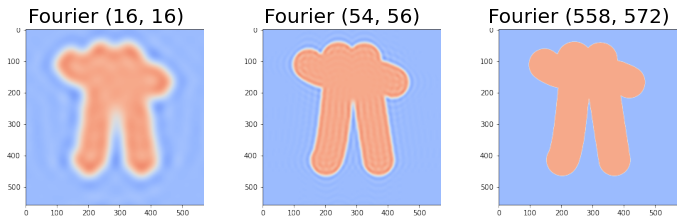

In [25]:
c2 = plt.imread("images/piFourier/fourier-16-16.png")
c3 = plt.imread("images/piFourier/fourier-54-56.png")
c4 = plt.imread("images/piFourier/fourier-558-572.png")

fig, ax = plt.subplots(1, 3, figsize=(12,5))
fst=20

ax[0].axis("off")
ax[0].imshow(c2)
ax[0].set_title("Fourier (16, 16)", fontsize=fst)

ax[1].axis("off")
ax[1].imshow(c3)
ax[1].set_title("Fourier (54, 56)", fontsize=fst)

ax[2].axis("off")
ax[2].imshow(c4)
ax[2].set_title("Fourier (558, 572)", fontsize=fst)

fig.savefig(f"piFourierExample.png", transparent=True, bbox_inches='tight')
plt.show()

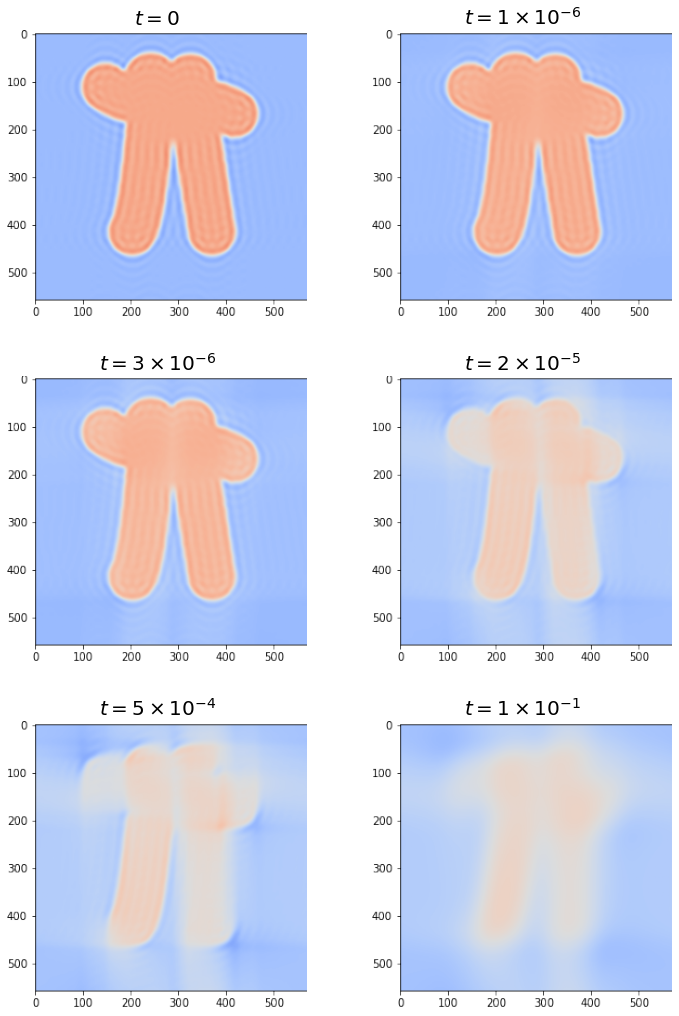

In [26]:
c1 = plt.imread("images/piTime/fourier-54-56-t-0.0000000.png")
c2 = plt.imread("images/piTime/fourier-54-56-t-0.0000010.png")
c3 = plt.imread("images/piTime/fourier-54-56-t-0.0000030.png")
c4 = plt.imread("images/piTime/fourier-54-56-t-0.0000200.png")
c5 = plt.imread("images/piTime/fourier-54-56-t-0.0005000.png")
c6 = plt.imread("images/piTime/fourier-54-56-t-0.1000000.png")

fig, ax = plt.subplots(3, 2, figsize=(12,18))
fst=20

ax[0, 0].axis("off")
ax[0, 0].imshow(c1)
ax[0, 0].set_title("$t = 0$", fontsize=fst)

ax[0, 1].axis("off")
ax[0, 1].imshow(c2)
ax[0, 1].set_title("$t = 1\\times 10^{-6}$", fontsize=fst)

ax[1, 0].axis("off")
ax[1, 0].imshow(c3)
ax[1, 0].set_title("$t = 3\\times 10^{-6}$", fontsize=fst)

ax[1, 1].axis("off")
ax[1, 1].imshow(c4)
ax[1, 1].set_title("$t = 2\\times 10^{-5}$", fontsize=fst)

ax[2, 0].axis("off")
ax[2, 0].imshow(c5)
ax[2, 0].set_title("$t = 5\\times 10^{-4}$", fontsize=fst)

ax[2, 1].axis("off")
ax[2, 1].imshow(c6)
ax[2, 1].set_title("$t = 1\\times 10^{-1}$", fontsize=fst)

fig.savefig(f"piTimeExample.png", transparent=True, bbox_inches='tight')
plt.show()